In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pycountry
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

import preprocess as pre

In [2]:
users_file = "BX-Users.csv"
books_file = "BX-Books.csv"
rating_file = "BX-Ratings.csv"
new_users_file = "BX-NewBooksUsers.csv"
new_books_file = "BX-NewBooks.csv"
new_ratings_file = "BX-NewBooksRatings.csv"

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,146233,athens,georgia,united states,5.0,0-10,0786886994,7,ice bound : a doctor's incredible battle for s...,maryanne vollers,2002,miramax,high
1,116090,athens,georgia,united states,25.0,20-30,0786886994,7,ice bound : a doctor's incredible battle for s...,maryanne vollers,2002,miramax,high
2,268110,westerville,ohio,united states,25.0,20-30,0786886994,6,ice bound : a doctor's incredible battle for s...,maryanne vollers,2002,miramax,medium
3,176853,fort worth,texas,united states,31.0,30-40,0786886994,10,ice bound : a doctor's incredible battle for s...,maryanne vollers,2002,miramax,high
4,24878,ottawa,ontario,canada,35.0,30-40,0786886994,7,ice bound : a doctor's incredible battle for s...,maryanne vollers,2002,miramax,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204159,232373,calgary,alberta,canada,65.0,60-70,0449200183,8,braided lives,marge piercy,1983,ballantine books,high
204160,118632,atlanta,georgia,united states,64.0,60-70,0312853807,7,zero coupon,paul erdman,1993,st martins pr,high
204161,160697,erie,pennsylvania,united states,67.0,60-70,0312853807,7,zero coupon,paul erdman,1993,st martins pr,high
204162,158606,dunedin,florida,united states,72.0,70-80,0312853807,10,zero coupon,paul erdman,1993,st martins pr,high


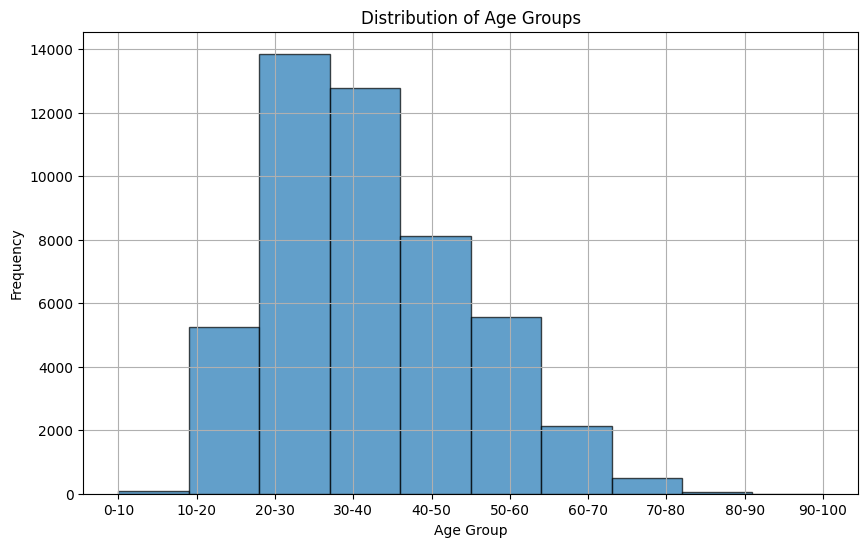

In [3]:
users_df = pd.read_csv(users_file)
ratings_df = pd.read_csv(rating_file)
books_df = pd.read_csv(books_file)

# Imputation missing data and discretise the age based on an age group
users_df = pre.ages_imputation(pre.weighted_age_dict(users_file), users_df)
users_df = pre.city_imputation(users_df)
users_df = pre.state_imputation(users_df)
users_df = pre.country_imputation(users_df)
merged_df = pre.discretising(users_df, ratings_df, books_df)
merged_df = pre.author_imputation(merged_df)
merged_df = pre.text_process(merged_df)
merged_df.to_csv("merge.csv", index=False)

merged_df

Text processing frist step: Write everyting into uppercase, unitify the counties of users.

# For Test Set

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,75306,montreal,quebec,canada,5.0,0-10,0375502645,7,moab is my washpot: an autobiography,stephen fry,1999,random house inc,high
1,237132,columbia,missouri,united states,26.0,20-30,0375502645,10,moab is my washpot: an autobiography,stephen fry,1999,random house inc,high
2,190347,san diego,california,united states,45.0,40-50,0375502645,8,moab is my washpot: an autobiography,stephen fry,1999,random house inc,high
3,102542,new york,new york,united states,5.0,0-10,034531042X,5,wounded land (second chronicles of thomas cove...,stephen r. donaldson,1981,del rey books,medium
4,82751,calgary,alberta,canada,28.0,20-30,034531042X,5,wounded land (second chronicles of thomas cove...,stephen r. donaldson,1981,del rey books,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,267635,bartlesville,oklahoma,united states,69.0,60-70,0553583999,8,may there be a road,louis l'amour,2002,bantam books,high
23141,273190,coconut grove,metro manila,united states,71.0,70-80,091482967X,7,the blessings already are,john morton,2000,mandeville press,high
23142,251843,homer city,pennsylvania,united states,75.0,70-80,048629899X,7,the narrative of sojourner truth (dover thrift...,olive gilbert,1997,dover publications,high
23143,88389,severna park,maryland,united states,77.0,70-80,0310405009,6,a rustle of angels: stories about angels in re...,marilynn carlson webber,1994,zondervan,medium


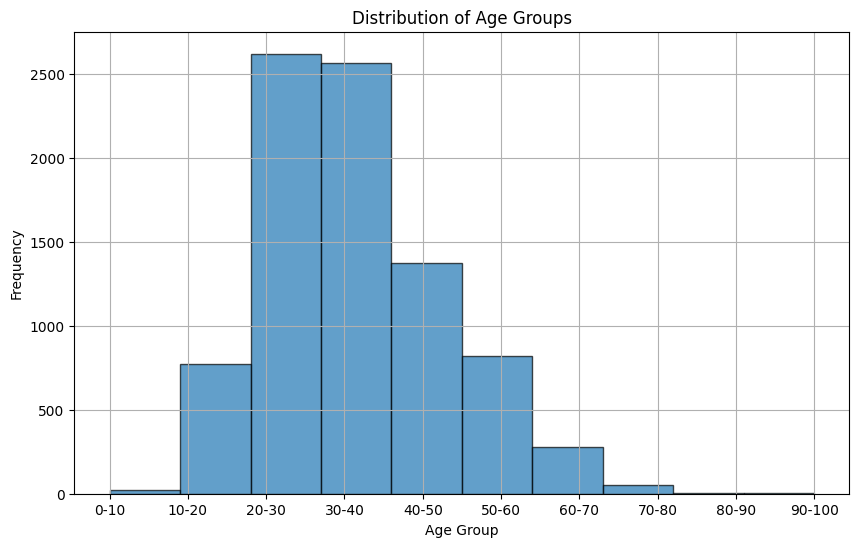

In [4]:
new_users_df = pd.read_csv(new_users_file)
new_ratings_df = pd.read_csv(new_ratings_file)
new_books_df = pd.read_csv(new_books_file)

# Imputation missing data and discretise the age based on an age group
new_users_df = pre.ages_imputation(pre.weighted_age_dict(new_users_file), new_users_df)
new_users_df = pre.city_imputation(new_users_df)
new_users_df = pre.state_imputation(new_users_df)
new_users_df = pre.country_imputation(new_users_df)
test_merged_df = pre.discretising(new_users_df, new_ratings_df, new_books_df)
test_merged_df = pre.author_imputation(test_merged_df)
test_merged_df = pre.text_process(test_merged_df)
test_merged_df

In [5]:
for feature in [
    "User-City",
    "User-State",
    "User-Country",
    "Age-Group",
    "Book-Author",
    "Year-Of-Publication",
    "Book-Publisher",
    "Book-Title"
]:
    print(
        feature,
        pre.compute_information_gain(
            merged_df[feature], merged_df["Rating_Category"]
        ).round(4),
    )

User-City 0.1038
User-State 0.0166
User-Country 0.0022
Age-Group 0.0008
Book-Author 0.0751
Year-Of-Publication 0.0027
Book-Publisher 0.0231
Book-Title 0.1435


In [6]:
# Deleted Features with low IG to train the DT
new_features = [
    "User-City",
    "Book-Author",
    "Book-Title",
]

train_X = OrdinalEncoder().fit_transform(merged_df[new_features])
train_y = OrdinalEncoder().fit_transform(merged_df[["Rating_Category"]])

test_X = OrdinalEncoder().fit_transform(test_merged_df[new_features])
test_y = OrdinalEncoder().fit_transform(test_merged_df[["Rating_Category"]])

# Initialise the DT
dt_classifier = DecisionTreeClassifier(criterion="entropy")

# Train the model
dt_classifier.fit(train_X, train_y)

pred_y = dt_classifier.predict(test_X)

accuracy = accuracy_score(pred_y, test_y)
print(accuracy)

0.6224238496435516


## Try K-NN